# 2016 Circular-cylindrical (CC) model article validation

**Article**: A CIRCULAR-CYLINDRICAL FLUX-ROPE ANALYTICAL MODEL FOR MAGNETIC CLOUDS

**Authors**: T. Nieves-Chinchilla, M. G. Linton, M. A. Hidalgo, A. Vourlidas, N. P. Savani, A. Szabo0, C. Farrugia and W. 

**DOI**: [doi:10.3847/0004-637X/823/1/27](https://doi.org/10.3847/1538-4357/aac951)

In [2]:
# This is needed to import the CC model from this location in this project.
import sys
sys.path.append("../..")

# Import the magnetic flux rope models
from MagneticFluxRopeModels.CCModel import CCModel

# Import necessary Python libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# Unit conversions
WB_TO_MX = 1e8

# Figure 2 (a)

Ratio between poloidal and axial current density for combined pairs of m and n.

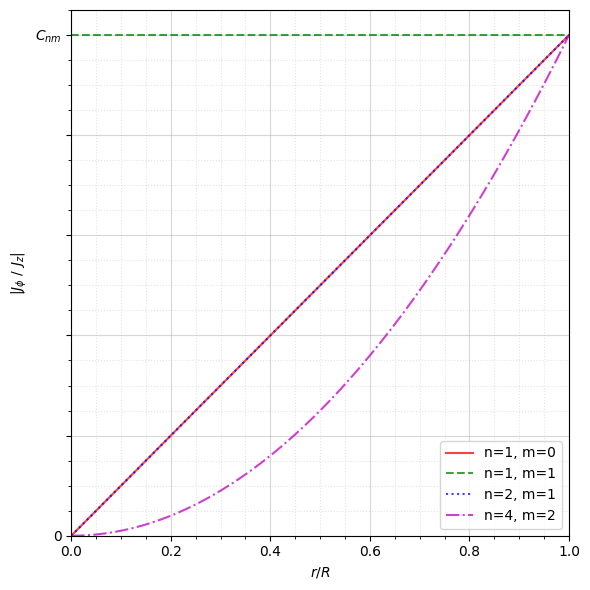

In [3]:
R = 1.0
tau = 1.0

fig, ax = plt.subplots(figsize=(6, 6), tight_layout=True)

for n, m, colour, line_style in zip([1, 1, 2, 4], [0, 1, 1, 2], ["r", "g", "b", "m"], ["-", "--", ":", "-."]):
    model = CCModel(B_z_0=1, R=R, tau=tau, n=n, m=m, C_nm=1.0)
    r_range, _, J_field, *_ = model.radial_coordinate_sweep(num_points=101)
    
    J_psi_z_ratio = J_field[1:, 1] / J_field[1:, 2]
    
    if abs(J_field[0, 2]) > 1e-10:
        J_psi_z_ratio_0 = J_field[0, 1] / J_field[0, 2]
    else:
        if abs(J_psi_z_ratio[0]) < 1e-1:
            J_psi_z_ratio_0 = 0
        else:
            J_psi_z_ratio_0 = J_psi_z_ratio[0]
        
    J_psi_z_ratio = np.hstack([J_psi_z_ratio_0, J_psi_z_ratio])
    ax.plot(r_range, J_psi_z_ratio, label=f"n={n}, m={m}", c=colour, linestyle=line_style, alpha=0.75)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1.05)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, None, None, None, None, "$C_{nm}$"])
ax.set_xlabel("$r/R$")
ax.set_ylabel(r"|$J_\phi$ / $J_z$|")
ax.legend()
ax.grid(which="major", alpha=0.5)
ax.grid(which="minor", alpha=0.35, linestyle=':')
ax.minorticks_on()
plt.savefig("CC_current_density_field.png", dpi=150)
plt.show()
plt.show()

# Figure 2 (b): magnetic field
The axial magnetic field model component for n = [1, 2, 4] and poloidal magnetic field model component for pairs n, m = [1, 0], [1, 1], [4, 2].

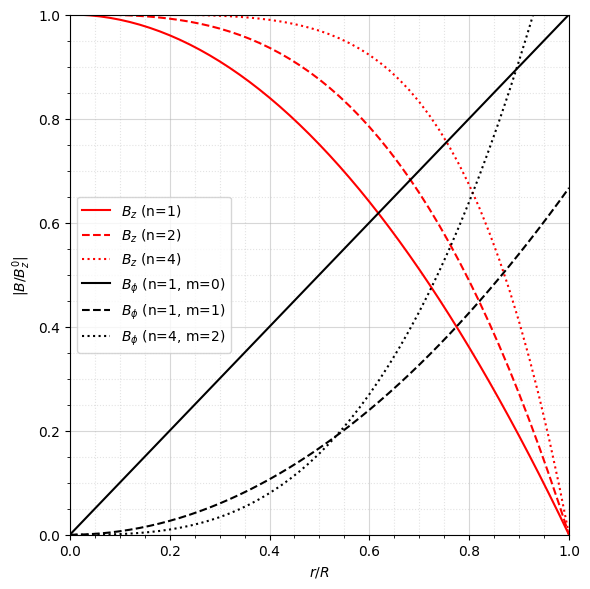

In [4]:
R = 1.0
tau = 1.0
C_nm = 1

fig, ax = plt.subplots(figsize=(6, 6), tight_layout=True)

for n, line_style in zip([1, 2, 4], ["-", "--", ":"]):
    model = CCModel(B_z_0=1, R=R, tau=tau, C_nm=C_nm, n=n, m=0)
    r_range, B_field, *_ = model.radial_coordinate_sweep()
    ax.plot(r_range, B_field[:, 2], label=f"$B_z$ (n={model.n})", c="r", linestyle=line_style)

for n, m, line_style in zip([1, 1, 4], [0, 1, 2], ["-", "--", ":"]):
    model = CCModel(B_z_0=1, R=R, tau=tau, C_nm=C_nm, n=n, m=m)
    r_range, B_field, *_ = model.radial_coordinate_sweep()
    ax.plot(r_range, B_field[:, 1], label=f"$B_\\phi$ (n={model.n}, m={model.m})", c="k", linestyle=line_style)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("$r/R$")
ax.set_ylabel("$|B/B_z^0|$")
ax.legend()
ax.grid(which="major", alpha=0.5)
ax.grid(which="minor", alpha=0.35, linestyle=':')
ax.minorticks_on()
plt.savefig("CC_magnetic_field.png", dpi=150)
plt.show()

In [5]:
from PIL import Image

# Join the two figures into one
# Load all of the images
images = [Image.open(image_path) for image_path in ["CC_current_density_field.png", "CC_magnetic_field.png"]]

# Assume all images are the same size
width, height = images[0].size

# Create a new blank image with size to hold a 2x2 grid
combined = Image.new("RGBA", (2*width, height))

# Paste the 4 images into the correct positions
for imgage_idx, image in enumerate(images):
    combined.paste(image, (imgage_idx*width, 0))

# Save the combined image
combined.save("CC_combined.png")

# Figure 2 (c): twist

/Users/macbookpro/Documents/MagneticFluxRopeModels/article_validation/2016_CC/../../MagneticFluxRopeModels/ECModel.py:207: RuntimeWarning: divide by zero encountered in scalar divide
  return L*B_phi / (2*math.pi*r*B_z)


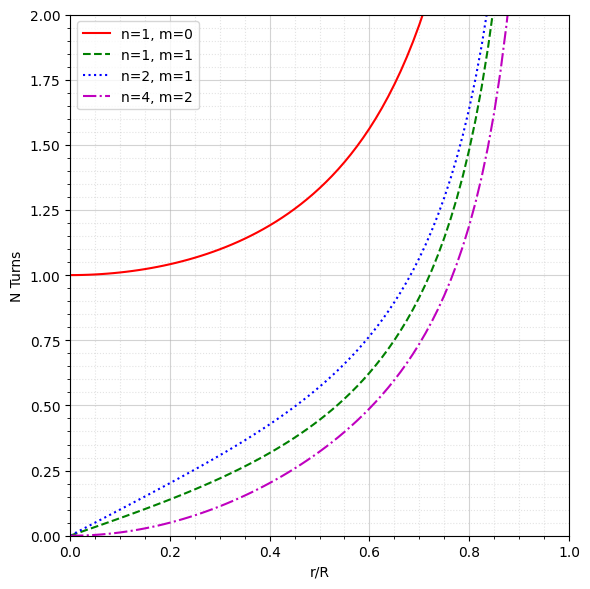

In [6]:
R = 1.0 # Does not matter for the twist calculation
B_z_0 = 1 # Does not matter for the twist calculation
tau = 1.0

fig, ax = plt.subplots(figsize=(6, 6), tight_layout=True)

for n, m, colour, line_style in zip([1, 1, 2, 4], [0, 1, 1, 2], ["r", "g", "b", "m"], ["-", "--", ":", "-."]):
    model = CCModel(B_z_0=B_z_0, R=R, tau=tau, C_nm=1.0, n=n, m=m)

    N = 81
    r_range = np.linspace(model.R / 1e4, model.R, N, endpoint=True)
    n_turns = np.zeros((N))

    for idx, r in enumerate(r_range):
        n_turns[idx] = model.get_twist(r, phi=0, L=2*math.pi*model.R)

    ax.plot(r_range / model.R, n_turns, c=colour, linestyle=line_style, label=f"n={n}, m={m}")
    
ax.set_xlim(0, 1)
ax.set_ylim(0, 2)
ax.set_xlabel("r/R")
ax.set_ylabel("N Turns")
ax.legend()
ax.grid(which="major", alpha=0.55)
ax.grid(which="minor", alpha=0.35, linestyle=':')
ax.minorticks_on()
plt.savefig("CC_twist.png", dpi=150)
plt.show()

# Table 2

The table has been saved as a CSV file.

The model parameters are set to n = 1 and m = 0.

In [12]:
# Load the CSV with the table containing the CC model parameters for the fittings
table_2_df = pd.read_csv("cc_2016_table_2.csv")
table_2_df

,event,tau,alpha_n,C1,phi,theta,y_0,R,Phi_z,Phi_phi,H
0,2009 Sep 30 (273),1,3.72,1.46,302,22,0.16,0.042,0.18,20,-
1,2009 Sep 30 (273),2,2.00,0.64,313,21,0.26,0.038,0.14,18,-
2,2010 Jan 01 (001),1,0.40,0.82,72,22,0.08,0.105,0.75,61,+
3,2010 Jan 01 (001),2,0.16,0.36,82,25,0.04,0.109,0.81,62,+
4,2012 Oct 12 (286),1,1.28,1.17,227,-63,0.23,0.081,0.84,62,-
5,2012 Oct 12 (286),2,0.51,0.49,224,-66,0.29,0.081,0.84,62,-
6,2012 Oct 31 (305),1,0.57,1.02,14,-74,0.02,0.114,1.46,88,+
7,2012 Oct 31 (305),2,0.19,0.30,30,-75,0.09,0.116,1.20,106,+


In [14]:
mu_0 = 4*math.pi*1e-7
AU_to_m = 149_597_870_700.0
n = 1
m = 0

table_2_models = list()

for model_idx in range(len(table_2_df)):
    table_2_row = table_2_df.iloc[model_idx]

    tau = table_2_row["tau"]
    R = table_2_row["R"]
    B_z_0 = (table_2_row["alpha_n"] * 1e-22) * (mu_0 * tau * math.pow(R * AU_to_m, n + 1)) / (n + 1) # **2
    B_z_0 *= 1e9
    table_2_df.loc[model_idx, "B_z_0"] = B_z_0

    cc_model = CCModel(n=n, m=m, tau=tau, R=R, C_nm=table_2_row["C1"], B_z_0=B_z_0)

    table_2_df.loc[model_idx, "Phi_z_validation"] = cc_model.get_total_axial_magnetic_flux(units="Mx") / 1e21
    table_2_df.loc[model_idx, "Phi_phi_validation"] = cc_model.get_total_poloidal_magnetic_flux(units="Mx") / 1e8

    table_2_df.loc[model_idx, "H_validation"] = "+" if table_2_row["C1"] > 0 else "-"
    table_2_df.loc[model_idx, "alpha_n_validation"] = (cc_model.alpha_n * 1e-9) * 1e22

    # Append the created model to a list.
    table_2_models.append(cc_model)

table_2_df["Phi_z_error"] = abs(table_2_df["Phi_z_validation"]) - table_2_df["Phi_z"]
table_2_df["Phi_z_factor"] =  table_2_df["Phi_z"] / table_2_df["Phi_z_validation"]
#table_2_df["Psi_z_factor_errorbar"] = 0.01 / table_2_df["Psi_z"]

table_2_df["Phi_phi_error"] = abs(table_2_df["Phi_phi_validation"]) - table_2_df["Phi_phi"]
table_2_df["Phi_phi_factor"] = table_2_df["Phi_phi_validation"] / table_2_df["Phi_phi"]
#table_2_df["Psi_phi_factor_errorbar"] = (table_2_df["Psi_phi"] / (table_2_df["Psi_phi_article"])**2) * 0.01
table_2_df

,event,tau,alpha_n,C1,phi,theta,y_0,R,Phi_z,Phi_phi,H,B_z_0,Phi_z_validation,Phi_phi_validation,H_validation,alpha_n_validation,Phi_z_error,Phi_z_factor,Phi_phi_error,Phi_phi_factor
0,2009 Sep 30 (273),1,3.72,1.46,302,22,0.16,0.042,0.18,20,-,9.227248,0.057219,39.709467,+,3.72,-0.122781,3.145799,19.709467,1.985473
1,2009 Sep 30 (273),2,2.00,0.64,313,21,0.26,0.038,0.14,18,-,8.121904,0.061842,36.070895,+,2.00,-0.078158,2.263815,18.070895,2.003939
2,2010 Jan 01 (001),1,0.40,0.82,72,22,0.08,0.105,0.75,61,+,6.201108,0.240336,118.787335,+,0.40,-0.509664,3.120633,57.787335,1.947333
3,2010 Jan 01 (001),2,0.16,0.36,82,25,0.04,0.109,0.81,62,+,5.346058,0.334926,121.074610,+,0.16,-0.475074,2.418446,59.074610,1.952816
4,2012 Oct 12 (286),1,1.28,1.17,227,-63,0.23,0.081,0.84,62,-,11.808934,0.272365,122.302482,+,1.28,-0.567635,3.084096,60.302482,1.972621
5,2012 Oct 12 (286),2,0.51,0.49,224,-66,0.29,0.081,0.84,62,-,9.410244,0.325561,116.355055,+,0.51,-0.514439,2.580159,54.355055,1.876694
6,2012 Oct 31 (305),1,0.57,1.02,14,-74,0.02,0.114,1.46,88,+,10.416342,0.475878,174.158767,+,0.57,-0.984122,3.068013,86.158767,1.979077
7,2012 Oct 31 (305),2,0.19,0.30,30,-75,0.09,0.116,1.20,106,+,7.190023,0.510162,207.951673,+,0.19,-0.689838,2.352193,101.951673,1.961808


In [9]:
model_idx = 0
B_z_0 = table_2_df.loc[model_idx, "B_z_0"]
tau = table_2_df.loc[model_idx, "tau"]
Bscal = 1e-9
delta = 1.0
RR = table_2_df.loc[model_idx, "R"]
AU = cc_model.AU_to_m
Faxial = 1e-12 * math.pi * B_z_0 * Bscal * (tau - 2.0 / (n + 3.0)) * (delta * RR * AU)**2
Faxial

np.float64(0.5721916225875157)

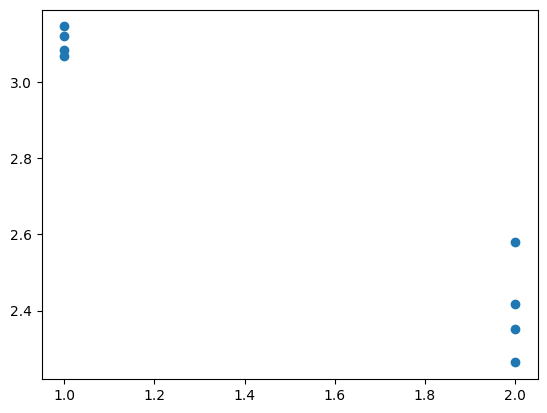

In [10]:
plt.scatter(table_2_df["tau"], table_2_df["Phi_z_factor"])
#plt.errorbar(table_2_df["tau"], table_2_df["Psi_z_factor"], yerr=table_2_df["Psi_z_factor_errorbar"], fmt="o")